In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [2]:
data = pd.read_csv('Realtime_NN.csv',header = None)
data

,0,1,2,3,4,5
0,3.295837,0.150577,NaN,NaN,NaN,NaN
1,3.295898,0.172088,NaN,NaN,NaN,NaN
2,3.295959,0.236621,NaN,NaN,NaN,NaN
3,3.296021,0.232372,NaN,NaN,NaN,NaN
4,3.296082,0.185632,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
7096,6.493408,-0.084716,NaN,NaN,NaN,NaN
7097,6.493469,-0.086575,NaN,NaN,NaN,NaN
7098,6.493530,-0.071969,NaN,NaN,NaN,NaN
7099,6.493591,-0.010357,NaN,NaN,NaN,NaN


In [3]:
data = data.drop(columns=[2, 3, 4, 5])
data.columns = ['X', 'Y']
data

,X,Y
0,3.295837,0.150577
1,3.295898,0.172088
2,3.295959,0.236621
3,3.296021,0.232372
4,3.296082,0.185632
...,...,...
7096,6.493408,-0.084716
7097,6.493469,-0.086575
7098,6.493530,-0.071969
7099,6.493591,-0.010357


In [4]:
# Split the data into 80% training and 20% testing sets
X = data[['X']]
y = data['Y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
# Create and fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [6]:
# Predict the target values for the test set
y_pred = model.predict(X_test)

In [7]:
# Create a DataFrame with X, Y_actual, and Y_predict for 20% test set
test_results = pd.DataFrame({
    'X': X_test['X'],
    'Y_actual': y_test,
    'Y_predict': y_pred
})
test_results

,X,Y_actual,Y_predict
6094,6.432251,0.010888,0.018851
4447,6.331726,0.023901,0.018697
4677,6.345764,0.184570,0.018719
4832,6.355225,-0.718627,0.018733
3796,6.291992,0.026291,0.018636
...,...,...,...
6521,6.458313,-0.124286,0.018891
3829,6.294006,0.093745,0.018640
1649,6.160950,0.123489,0.018436
4819,6.354431,-0.129597,0.018732


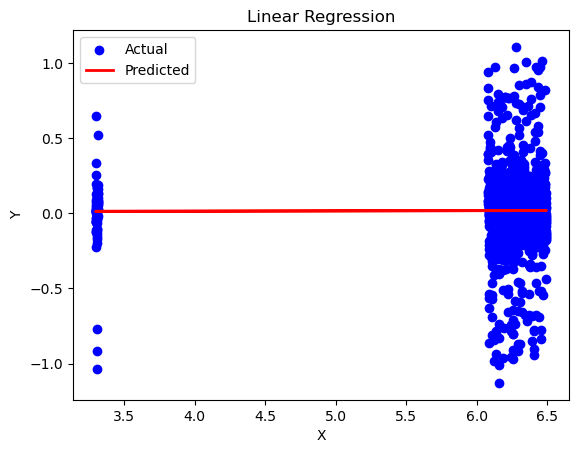

In [8]:
# Plot the data points and the regression line
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Linear Regression')
plt.legend()
plt.show()